In [2]:
import matplotlib.pyplot as plt
import os
import re
from PIL import Image
import pandas as pd 
import ast
import numpy as np 

In [3]:

df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/60_shared_proteins_PPI_clusters_pathway_names.csv")
df['Top_Pathways'] = df['Top_Pathways'].apply(ast.literal_eval)

# Create a mapping from cluster number to the first element of Top_Pathways lists
cluster_to_pathway = df.set_index('Cluster')['Top_Pathways'].to_dict()
cluster_to_pathway = {str(k): v[0] if v else "No Pathway" for k, v in cluster_to_pathway.items()}

In [4]:
chowdry_groups = ["Drug Metabolism & Biological Oxidation","Metabolic", "Hypoxia", "NF-kB"]

In [5]:

# Set the path to the folder containing the images
folder_path = '/mnt/ncshare/ozkilim/BRCA/heatmaps/HGSOC_heatmaps/heatmap_raw_results/HGSOC_MCAT_mayo/Unspecified/1009536_171140_ImageActual'



regex = re.compile(r'(\d+)\.png$')

# List and sort the PNG files in the folder based on the number at the end of the filename
image_files = [f for f in os.listdir(folder_path) if regex.search(f)]
image_files.sort(key=lambda f: int(regex.search(f).group(1)))

# Create a 3x3 grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Loop over the grid and add the images
for i, ax in enumerate(axes.flatten()):
    if i < len(image_files):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)
        ax.imshow(img)

        # Extract the cluster number and get the corresponding pathway
        # cluster_num = regex.search(image_files[i]).group(1)
        # pathway_title = cluster_to_pathway.get(cluster_num, "Unknown Pathway")
        pathway_title = chowdry_groups[i]
        ax.set_title(pathway_title,fontsize=12)

        ax.axis('off')
    else:
        ax.axis('off')

plt.suptitle("HGSOC MCAT Histo-proteomic pathways cross attention",fontsize=15)
# Display the plot
plt.tight_layout()
fig.patch.set_facecolor('white')  # Set the background color of the figure to white

# Saving the figure in high quality
output_file = 'HGSOC_MCAT_histo_proteo_cross_attn.png'  # Specify your output path and file name
plt.savefig(output_file, bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())  # Save with high resolution
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ncshare/ozkilim/BRCA/heatmaps/HGSOC_heatmaps/heatmap_raw_results/HGSOC_MCAT_mayo/Unspecified/1009536_171140_ImageActual'

In [ ]:
# Vis patches 

In [ ]:
# Vis pathways/ proteins for early and late fusion. All setup to make figs. 


# ranking of pathways and bars virticle.

# Use chowdry names. 

omics_attns = np.load('/mnt/ncshare/ozkilim/BRCA/heatmaps/HGSOC_heatmaps/heatmap_raw_results/HGSOC_MCAT_mayo/Unspecified/1009536_171140_ImageActual/omics_attns.npy')
omics_attns



array([[-0.03702688,  0.10674705,  0.20605391,  0.09643421]],
      dtype=float32)

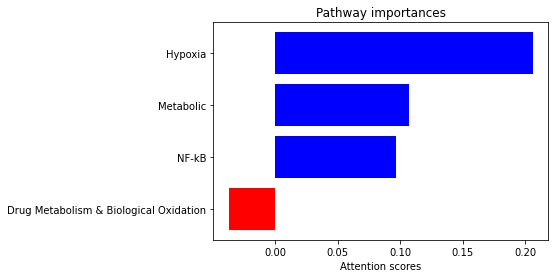

In [ ]:

# Example data

values = omics_attns.copy()[0]


sorted_indices = np.argsort(values)
sorted_strings = np.array(chowdry_groups)[sorted_indices]
sorted_values = values[sorted_indices]

# Create the plot
fig, ax = plt.subplots()

# Plotting each bar individually to assign colors
for i in range(len(sorted_values)):
    color = 'blue' if sorted_values[i] > 0 else 'red'
    ax.barh(sorted_strings[i], sorted_values[i], color=color)

# Set labels and title if necessary
ax.set_xlabel('Attention scores')
ax.set_title('Pathway importances')

plt.show()

KeyboardInterrupt: 

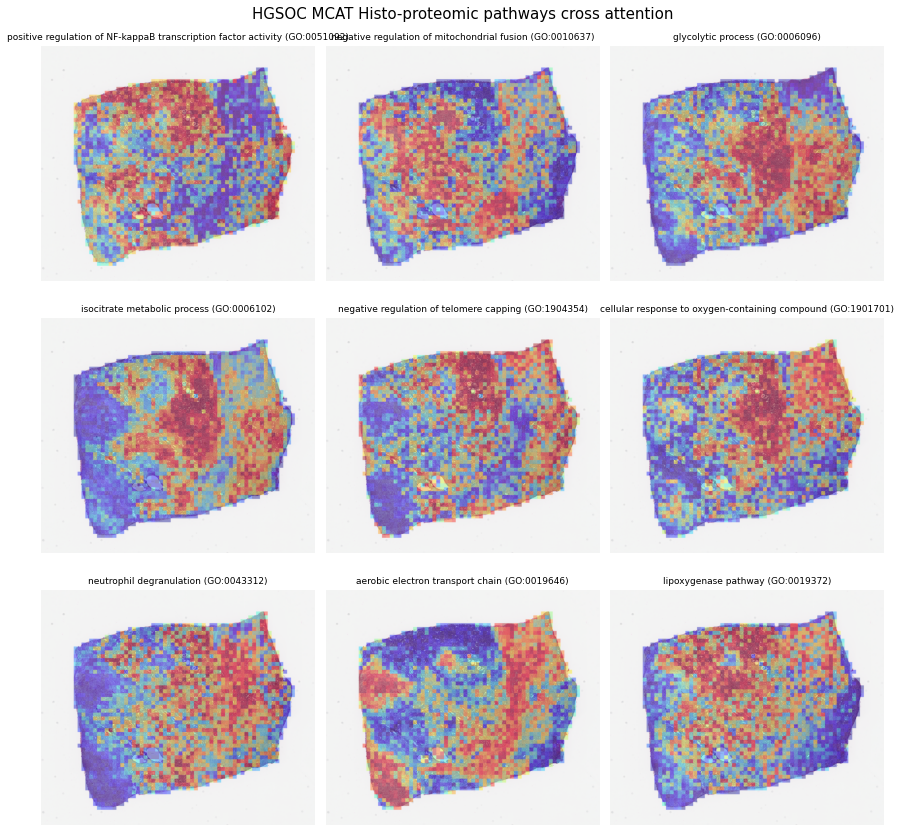

In [6]:
# then load protein improtances for MMF ...


# Set the path to the folder containing the images
folder_path = '/mnt/ncshare/ozkilim/BRCA/heatmaps/heatmaps_multimodal/heatmap_raw_results/HGSOC_MCAT_mayo/Unspecified/1009536_171140_ImageActual'

regex = re.compile(r'(\d+)\.png$')

# List and sort the PNG files in the folder based on the number at the end of the filename
image_files = [f for f in os.listdir(folder_path) if regex.search(f)]
image_files.sort(key=lambda f: int(regex.search(f).group(1)))

# Create a 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Loop over the grid and add the images
for i, ax in enumerate(axes.flatten()):
    if i < len(image_files):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)
        ax.imshow(img)

        # Extract the cluster number and get the corresponding pathway
        cluster_num = regex.search(image_files[i]).group(1)
        pathway_title = cluster_to_pathway.get(cluster_num, "Unknown Pathway")
        # pathway_title = chowdry_groups[i]
        ax.set_title(pathway_title,fontsize=9)

        ax.axis('off')
    else:
        ax.axis('off')

plt.suptitle("HGSOC MCAT Histo-proteomic pathways cross attention",fontsize=15)
# Display the plot
plt.tight_layout()
fig.patch.set_facecolor('white')  # Set the background color of the figure to white

# Saving the figure in high quality
output_file = 'HGSOC_MCAT_histo_proteo_cross_attn_PPI.png'  # Specify your output path and file name
plt.savefig(output_file, bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())  # Save with high resolution
plt.show()

### Get slides predicted correctly for pathologist investigation

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score

def calculate_accuracy_auc_and_correct_predictions(df, threshold=0.5):
    # Predict 1 if 'p_1' is greater than the threshold, else predict 0
    df['predicted_label'] = (df['p_1'] > threshold).astype(int)

    # Create a new column for correctly predicted samples (1 for correct, 0 for incorrect)
    df['correct_prediction'] = (df['predicted_label'] == df['label']).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(df['label'], df['predicted_label'])

    # Calculate AUC-ROC
    auc_roc = roc_auc_score(df['label'], df['p_1'])

    return accuracy, auc_roc, df



# models seem like not trained....?...
results = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/heatmaps/results/HGSOC_clm_sb.csv")
# results = results[0:300]
# Calculate accuracy, AUC-ROC and get DataFrame with correct predictions
accuracy, auc_roc, df_with_correct_predictions = calculate_accuracy_auc_and_correct_predictions(results, threshold=0.5)
print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)

df_with_correct_predictions[["correct_prediction","slide_id"]]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').